In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

In [2]:
df=  pd.read_csv('Voices_Cleaned1.csv', index_col=0)

In [3]:
df= df.drop(columns=['date','age','user','pronounce'])

# 1- First to model with only 1 feature "first_q"

In [4]:
model_features = ['first_q']

In [5]:
df.sex = df.sex.astype(int)

In [6]:
oversample = SMOTE(random_state=23)

In [7]:
def data_prepration(x): 
    x_features= x.loc[:,x.columns != "sex"]
    x_labels=x.loc[:,x.columns=="sex"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.2)
    print("length of training data")
    print(len(x_features_train))
    print("length of testing data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [8]:
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(df)

length of training data
4216
length of testing data
1055


In [9]:
columns = data_train_X.columns

In [10]:
os_data_X,os_data_y=oversample.fit_sample(data_train_X,data_train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["sex"])

print("length of oversampled data is ",len(os_data_X))
print("Number of males in oversampled data",len(os_data_y[os_data_y["sex"]==0]))
print("No.of females in oversampled data",len(os_data_y[os_data_y["sex"]==1]))

length of oversampled data is  7810
Number of males in oversampled data 3905
No.of females in oversampled data 3905


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
scaler = StandardScaler()
scaler.fit(df.loc[:,model_features]) 
X_train = scaler.transform(os_data_X.loc[:,model_features])
X_test = scaler.transform(data_test_X.loc[:,model_features])
y_train = list(os_data_y['sex'].values)
y_test = list(data_test_y['sex'].values)

In [12]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=23).fit(X_train, y_train)
print('Decision Tree Report')
print('train score is %s' %tree.score(X_train, y_train))
print('test score is %s' %tree.score(X_test, y_test))



#Train random forest model
forest = RandomForestClassifier(n_estimators=100, random_state=23).fit(X_train, y_train)
print('Random Forests Report')
print('train score is %s' %forest.score(X_train, y_train))
print('test score is %s' %forest.score(X_test, y_test))


#Train gradient boosting model
gb = GradientBoostingClassifier(random_state=23).fit(X_train, y_train)
print('Gradient Boosting Report')
print('train score is %s' %gb.score(X_train, y_train))
print('test score is %s' %gb.score(X_test, y_test))



Decision Tree Report
train score is 0.8130601792573624
test score is 0.8274881516587678
Random Forests Report
train score is 0.8130601792573624
test score is 0.8274881516587678
Gradient Boosting Report
train score is 0.7960307298335467
test score is 0.8


In [13]:
def create_report(model,X_train,X_test,y_train,y_test):
    clf= model
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    metrics_matrix=confusion_matrix(y_test,pred)
    print("the accuracy for this model is :",(metrics_matrix[0,0]+metrics_matrix[1,1])/(metrics_matrix[0,0]+metrics_matrix[0,1]+metrics_matrix[1,0]+metrics_matrix[1,1]))
    print("the recall for this model is :",metrics_matrix[1,1]/(metrics_matrix[1,1]+metrics_matrix[1,0]))


    fig= plt.figure(figsize=(6,3))
    print("TP",metrics_matrix[1,1]) 
    print("TN",metrics_matrix[0,0]) 
    print("FP",metrics_matrix[0,1]) 
    print("FN",metrics_matrix[1,0])
    sns.heatmap(metrics_matrix,cmap="coolwarm",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_Sex")
    plt.ylabel("Real_Sex")
    plt.show()
    print("\n----------Classification Report----------")
    print(classification_report(y_test,pred))

the accuracy for this model is : 0.8274881516587678
the recall for this model is : 0.6944444444444444
TP 50
TN 823
FP 160
FN 22


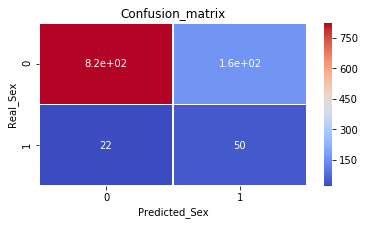


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       983
           1       0.24      0.69      0.35        72

   micro avg       0.83      0.83      0.83      1055
   macro avg       0.61      0.77      0.63      1055
weighted avg       0.92      0.83      0.86      1055



In [14]:
create_report(DecisionTreeClassifier(random_state=23),X_train,X_test,y_train,y_test)

the accuracy for this model is : 0.8274881516587678
the recall for this model is : 0.7083333333333334
TP 51
TN 822
FP 161
FN 21


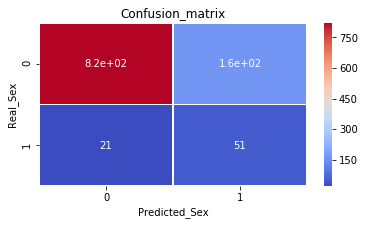


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       983
           1       0.24      0.71      0.36        72

   micro avg       0.83      0.83      0.83      1055
   macro avg       0.61      0.77      0.63      1055
weighted avg       0.92      0.83      0.86      1055



In [15]:
create_report(RandomForestClassifier(n_estimators=100,random_state=23),X_train,X_test,y_train,y_test)

the accuracy for this model is : 0.8
the recall for this model is : 0.7361111111111112
TP 53
TN 791
FP 192
FN 19


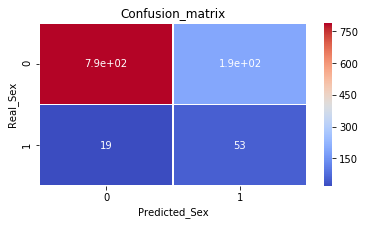


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       983
           1       0.22      0.74      0.33        72

   micro avg       0.80      0.80      0.80      1055
   macro avg       0.60      0.77      0.61      1055
weighted avg       0.92      0.80      0.84      1055



In [16]:
create_report(GradientBoostingClassifier(random_state=23),X_train,X_test,y_train,y_test)